In [43]:
# -*- coding: utf-8 -*-

#np.sum(data.values >= np.finfo(np.float64).max)
#np.sum(data.values >= np.finfo(np.float32).max)#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Aug  1 09:20:02 2018

@author: leaferickson
"""
#np.isnan(data.values.any())
#data.dropna(how = "any")


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
import imblearn.over_sampling
import matplotlib.pyplot as plt
data = pd.read_csv("../data.csv")

#data["value"] = data.groupby("name").transform(lambda x: x.fillna(x.mean()))
#X = data.loc[:,"Attr1":"Attr64"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45, stratify = y)
data_train, data_test = train_test_split(data, test_size=0.3, random_state=45, stratify = data["class"])

data_test.groupby("class").mean()
X_train = data_train.transform(lambda x: x.fillna(x.mean())).loc[:,"Attr1":"Attr64"]
y_train = data_train["class"]
X_test = data_test.transform(lambda x: x.fillna(x.mean())).loc[:,"Attr1":"Attr64"]
y_test = data_test["class"]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



ROS = imblearn.over_sampling.RandomOverSampler(\
                                               ratio={0:4728,1:190*24}, \
                                               random_state=42) 
    
X_train_oversample, y_train_oversample = ROS.fit_sample(X_train, y_train)


#N_estimators
n_estimators = [100, 200, 400, 1000]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num =8)]
# Minimum number of samples required to split a node
learning_rate = [0.1, 0.08, 0.12, 0.15]
# Ratio of columns used at each split
colsample_bylevel = [0.4, 0.25, 0.1]
# Impurity threshold change under which to no longer split
gamma = [0.02, 0.05, 0.1]
# Create the random grid
random_grid = {'max_depth': max_depth,
               'learning_rate': learning_rate,
               'colsample_bylevel': colsample_bylevel,
               'gamma': gamma}

# Use the random grid to search for best hyperparameters
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = XGBClassifier(), scoring = 'roc_auc', param_distributions = random_grid, n_iter = 40, cv = 3, verbose=2, random_state=31, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_oversample, y_train_oversample)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] max_depth=63, learning_rate=0.1, gamma=0.02, colsample_bylevel=0.25 
[CV] max_depth=63, learning_rate=0.1, gamma=0.02, colsample_bylevel=0.25 
[CV] max_depth=63, learning_rate=0.1, gamma=0.02, colsample_bylevel=0.25 
[CV] max_depth=16, learning_rate=0.1, gamma=0.05, colsample_bylevel=0.25 
[CV]  max_depth=63, learning_rate=0.1, gamma=0.02, colsample_bylevel=0.25, total=   2.6s
[CV] max_depth=16, learning_rate=0.1, gamma=0.05, colsample_bylevel=0.25 
[CV]  max_depth=63, learning_rate=0.1, gamma=0.02, colsample_bylevel=0.25, total=   3.4s
[CV] max_depth=16, learning_rate=0.1, gamma=0.05, colsample_bylevel=0.25 
[CV]  max_depth=63, learning_rate=0.1, gamma=0.02, colsample_bylevel=0.25, total=   3.5s
[CV] max_depth=16, learning_rate=0.1, gamma=0.1, colsample_bylevel=0.1 
[CV]  max_depth=16, learning_rate=0.1, gamma=0.05, colsample_bylevel=0.25, total=   3.5s
[CV] max_depth=16, learning_rate=0.1, gamma=0.1, colsample_bylevel

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.7s


[CV] max_depth=110, learning_rate=0.15, gamma=0.05, colsample_bylevel=0.4 
[CV]  max_depth=16, learning_rate=0.15, gamma=0.02, colsample_bylevel=0.25, total=   3.2s
[CV] max_depth=110, learning_rate=0.15, gamma=0.05, colsample_bylevel=0.4 
[CV]  max_depth=16, learning_rate=0.15, gamma=0.02, colsample_bylevel=0.25, total=   3.3s
[CV] max_depth=32, learning_rate=0.08, gamma=0.1, colsample_bylevel=0.4 
[CV]  max_depth=110, learning_rate=0.15, gamma=0.05, colsample_bylevel=0.4, total=   3.1s
[CV] max_depth=32, learning_rate=0.08, gamma=0.1, colsample_bylevel=0.4 
[CV]  max_depth=110, learning_rate=0.15, gamma=0.05, colsample_bylevel=0.4, total=   4.0s
[CV] max_depth=32, learning_rate=0.08, gamma=0.1, colsample_bylevel=0.4 
[CV]  max_depth=110, learning_rate=0.15, gamma=0.05, colsample_bylevel=0.4, total=   4.0s
[CV] max_depth=1, learning_rate=0.1, gamma=0.02, colsample_bylevel=0.25 
[CV]  max_depth=1, learning_rate=0.1, gamma=0.02, colsample_bylevel=0.25, total=   0.8s
[CV] max_depth=1, le

[CV] max_depth=1, learning_rate=0.08, gamma=0.05, colsample_bylevel=0.4 
[CV]  max_depth=16, learning_rate=0.08, gamma=0.05, colsample_bylevel=0.1, total=   2.8s
[CV] max_depth=1, learning_rate=0.08, gamma=0.05, colsample_bylevel=0.4 
[CV]  max_depth=1, learning_rate=0.08, gamma=0.05, colsample_bylevel=0.4, total=   0.6s
[CV] max_depth=110, learning_rate=0.12, gamma=0.05, colsample_bylevel=0.1 
[CV]  max_depth=94, learning_rate=0.08, gamma=0.02, colsample_bylevel=0.1, total=   1.8s
[CV] max_depth=110, learning_rate=0.12, gamma=0.05, colsample_bylevel=0.1 
[CV]  max_depth=1, learning_rate=0.08, gamma=0.05, colsample_bylevel=0.4, total=   0.9s
[CV] max_depth=110, learning_rate=0.12, gamma=0.05, colsample_bylevel=0.1 
[CV]  max_depth=94, learning_rate=0.08, gamma=0.02, colsample_bylevel=0.1, total=   2.1s
[CV] max_depth=47, learning_rate=0.15, gamma=0.05, colsample_bylevel=0.1 
[CV]  max_depth=110, learning_rate=0.12, gamma=0.05, colsample_bylevel=0.1, total=   1.7s
[CV] max_depth=47, lea

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'max_depth': [1, 16, 32, 47, 63, 78, 94, 110], 'learning_rate': [0.1, 0.08, 0.12, 0.15], 'colsample_bylevel': [0.4, 0.25, 0.1], 'gamma': [0.02, 0.05, 0.1]},
          pre_dispatch='2*n_jobs', random_state=31, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

In [44]:
rf_random.best_score_

1.0

In [45]:
rf_random.best_params_

{'max_depth': 16,
 'learning_rate': 0.15,
 'gamma': 0.02,
 'colsample_bylevel': 0.25}

In [46]:
rf_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.25,
       colsample_bytree=1, gamma=0.02, learning_rate=0.15,
       max_delta_step=0, max_depth=16, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

/home/leaferickson/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/leaferickson/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/leaferickson/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/leaferickson/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth valu

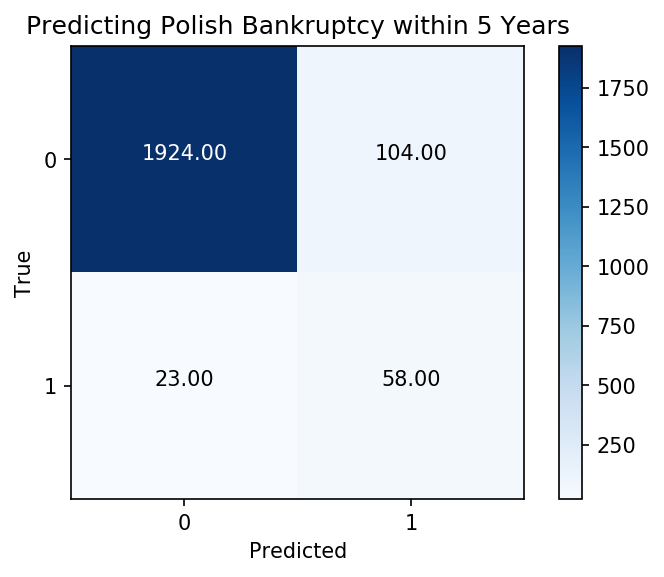

In [73]:
rf = XGBClassifier(n_estimators = 200, learning_rate = 0.15, gamma = 0.02, random_state = 31)
rf.fit(X_train_oversample, y_train_oversample)
rf.score(X_train, y_train)
rf.score(X_test, y_test)
roc_auc_score(y_test, rf.predict(X_test))



from sklearn.metrics import confusion_matrix
import itertools

plt.figure(dpi=150)
cm = confusion_matrix(y_test, rf.predict(X_test))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0,1])
plt.yticks([0,1])
plt.title("Predicting Polish Bankruptcy within 5 Years")
plt.ylabel("True")
plt.xlabel("Predicted")
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
#    plt.savefig("RF_Naive")# -*- coding: utf-8 -*-

In [74]:
roc_auc_score(y_test, rf.predict(X_test))

/home/leaferickson/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8323836657169991